In [82]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import scipy
import scipy.fftpack
import scipy.io as sio
import copy
import pylab as pl
import time
from IPython import display
from matplotlib.pyplot import figure
from termcolor import colored


{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Sat Aug 25 09:10:28 2018', '__version__': '1.0', '__globals__': [], 'cleanedSignal': array([[-0.45891912, -0.47168064, -0.48151474, ..., -0.43723537,
        -0.44782886, -0.44533749]]), 'origSignal': array([[ 0.34069747, -0.29900363, -0.92773336, ...,  1.23675819,
        -0.77687497, -0.10484616]])}
dict_keys(['__header__', '__version__', '__globals__', 'cleanedSignal', 'origSignal'])


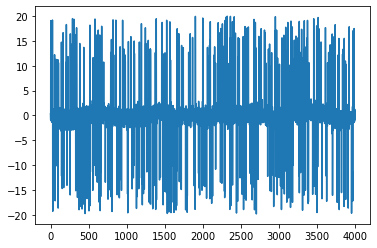

In [83]:
# import data
data = sio.loadmat('./denoising_codeChallenge.mat')
print(data)
print(data.keys())


origSignal = data["origSignal"][0]
cleanedSignal = data["cleanedSignal"][0]
n = len(origSignal)
#time  = np.arange(0,3,1/n)

# plot
plt.plot(range(0,n),origSignal)
plt.show()

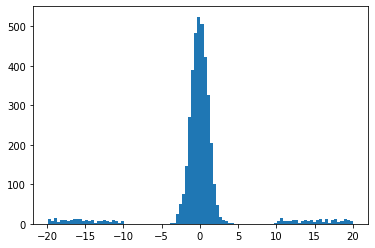

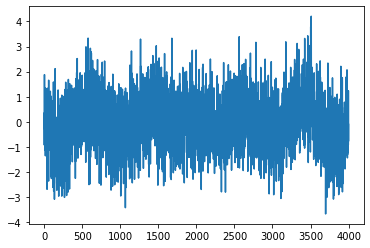

In [84]:
# use hist to pick threshold
plt.hist(origSignal,100)
plt.show()

suprathresh =  np.append(np.where( origSignal <-5)[0], np.where( origSignal >5)[0])


filtsig = copy.deepcopy(origSignal)

# loop through suprathreshold points and set to median of k
k = 10 # actual window is k*2+1
for ti in range(len(suprathresh)):
    # lower and upper bounds index
    lowbnd = np.max((0,suprathresh[ti]-k))
    uppbnd = np.min((suprathresh[ti]+k,n+1))
    # compute median of surrounding points
    filtsig[suprathresh[ti]] = np.median(origSignal[lowbnd:uppbnd])

plt.plot(range(0,n),filtsig)
plt.show()


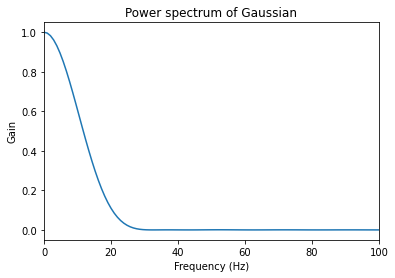

In [85]:
## create the Gaussian kernel
# full-width half-maximum: the key Gaussian parameter
fwhm = 30 # in ms

# normalized time vector in ms
k = 100
gtime = 1000*np.arange(-k,k)/len(filtsig)

# create Gaussian window
gauswin = np.exp( -(4*np.log(2)*gtime**2) / fwhm**2 )

# then normalize Gaussian to unit energy
gauswin = gauswin / np.sum(gauswin)

# compute N's
nConv = n + 2*k+1 - 1

gausX = scipy.fftpack.fft(gauswin,nConv)

hz = np.linspace(0,len(filtsig),nConv)

# plot Gaussian kernel
plt.plot(hz,np.abs(gausX)**2)
plt.ylabel('Gain'), plt.xlabel('Frequency (Hz)')
plt.title('Power spectrum of Gaussian')
plt.xlim([0,100])
plt.show()



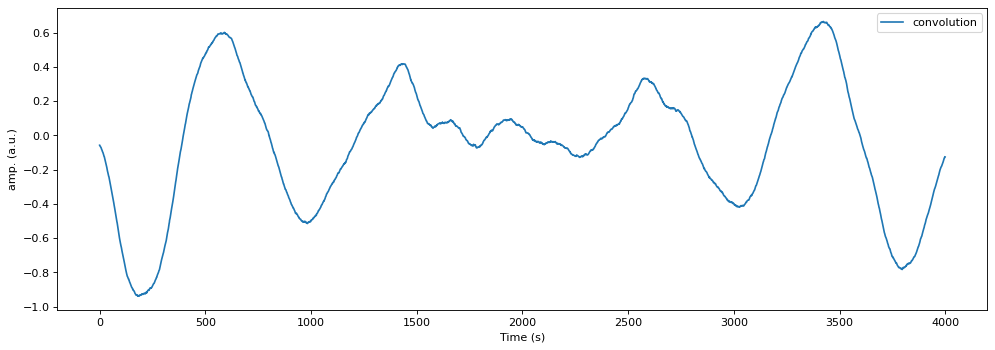

In [86]:


# FFTs
dataX = scipy.fftpack.fft(filtsig,nConv)
gausX = scipy.fftpack.fft(gauswin,nConv)

# IFFT
convres = np.real( scipy.fftpack.ifft( dataX*gausX ) )

# cut wings
convres = convres[k:-k]

### time-domain plot

# lines
figure(figsize=(15, 5), dpi=80)
plt.plot(range(0,n),convres, label='convolution')
plt.xlabel('Time (s)')
plt.ylabel('amp. (a.u.)')
plt.legend()
plt.show()

<Figure size 960x400 with 0 Axes>

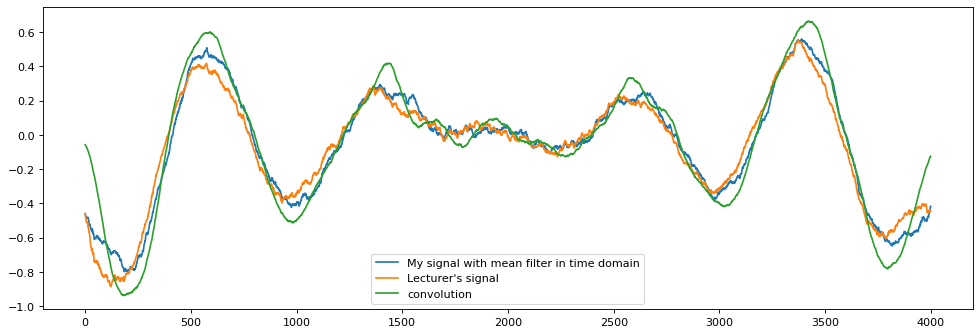

In [87]:
# compare the result in time domain filtering

from matplotlib.pyplot import figure
figure(figsize=(12, 5), dpi=80)

# initialize filtered signal vector
meanSig = np.zeros(n)

# implement the running mean filter
k = 150 # filter window is actually k*2+1
for i in range(0,n):
    # each point is the average of k surrounding points
    # original approach

    left_bound = max(1, i-k)
    right_bound = min(i+k, n)
    meanSig[i] = np.mean(filtsig[left_bound:right_bound])

figure(figsize=(15, 5), dpi=80)
plt.plot(range(0,n),meanSig, label='My signal with mean filter in time domain')
plt.plot(range(0,n),cleanedSignal, label='Lecturer\'s signal')
plt.plot(range(0,n),convres, label='convolution')
plt.legend()
plt.show()